In [715]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import plot_roc_curve

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.decomposition import NMF, PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (confusion_matrix, precision_score, 
                                    recall_score, accuracy_score, r2_score, 
                                    plot_confusion_matrix)

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, plot_confusion_matrix
from sklearn.cluster import DBSCAN

from sklearn import (
    cluster, decomposition, ensemble, manifold, 
    random_projection, preprocessing)
from sklearn.utils.class_weight import compute_class_weight

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# from sklearn.neighbors import KNeighborsRegressor

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pickle
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import random

import json

In [716]:
df = pd.read_json('../../data/basic_dataset.json')

In [717]:
df['is_retweeted'] = np.where(1, df.retweets >= 1, 0)
df['is_favorited'] = np.where(1, df.favorites >= 1, 0)

In [718]:
hashtags = {}
for text in df.tweet_text:
    if text[:3] == 'RT ':
        pass
    elif '#' in text:
        lst = text.split()
        ats = [at for at in lst if at[0] == '#']
        for tags in ats:
            tags = tags.replace(':', '')
            if tags not in hashtags:
                hashtags[tags] = 1
            else:
                hashtags[tags] += 1
    else:
        pass

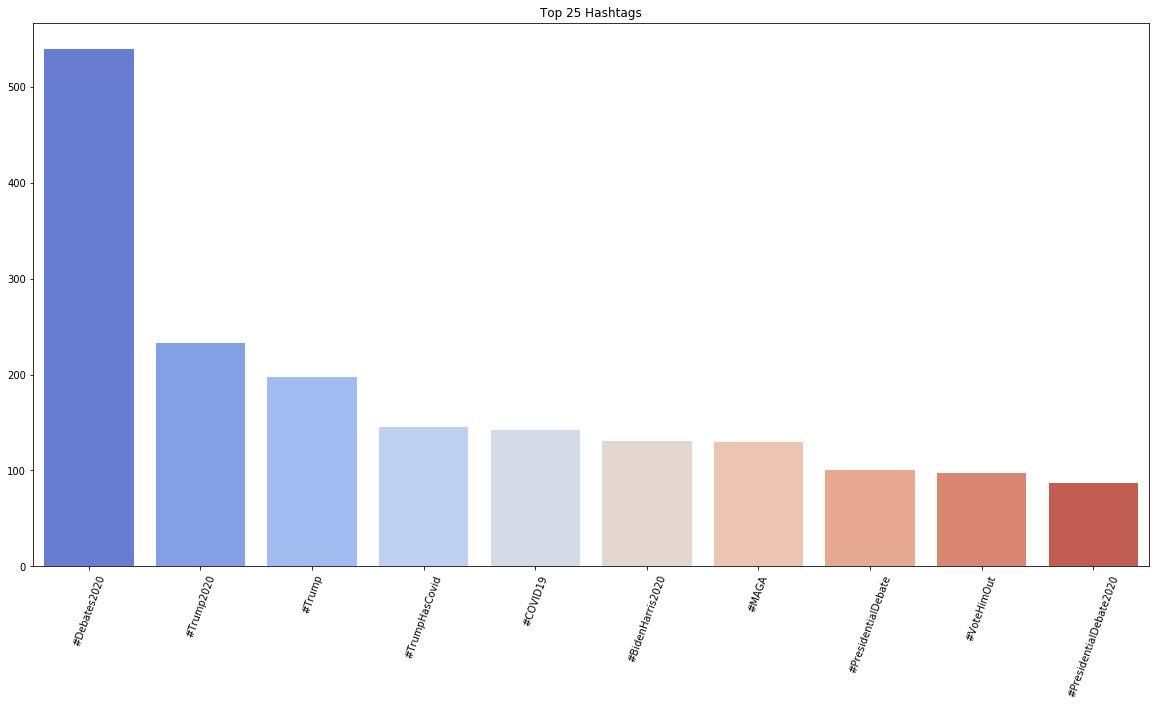

In [719]:
tags = np.array(list(hashtags.keys()))
counts = np.array(list(hashtags.values()))
top_10_tags = tags[counts.argsort()[::-1]][:10]
top_10_counts = counts[counts.argsort()[::-1]][:10]
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(top_10_tags, top_10_counts, palette='coolwarm')
plt.xticks(rotation=70)
plt.title('Top 25 Hashtags')
plt.savefig('../images/top_ten_hashtags.png');

In [720]:
non_rt_df = df[df['is_retweet'] == 0]
hashtagged = []
for i in top_10_tags:
    for text in non_rt_df.tweet_text:
        hashtagged.append((i in text)*1)
        
slices1 = np.linspace(len(non_rt_df.tweet_text), len(hashtagged), 10)

for i in range(len(top_10_tags)):
    if i == 0:
        non_rt_df[f'tags_{top_10_tags[i]}'] = hashtagged[:int(slices1[i])]
    else:
        non_rt_df[f'tags_{top_10_tags[i]}'] = hashtagged[int(slices1[i-1]):int(slices1[i])]


/home/heather/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/heather/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


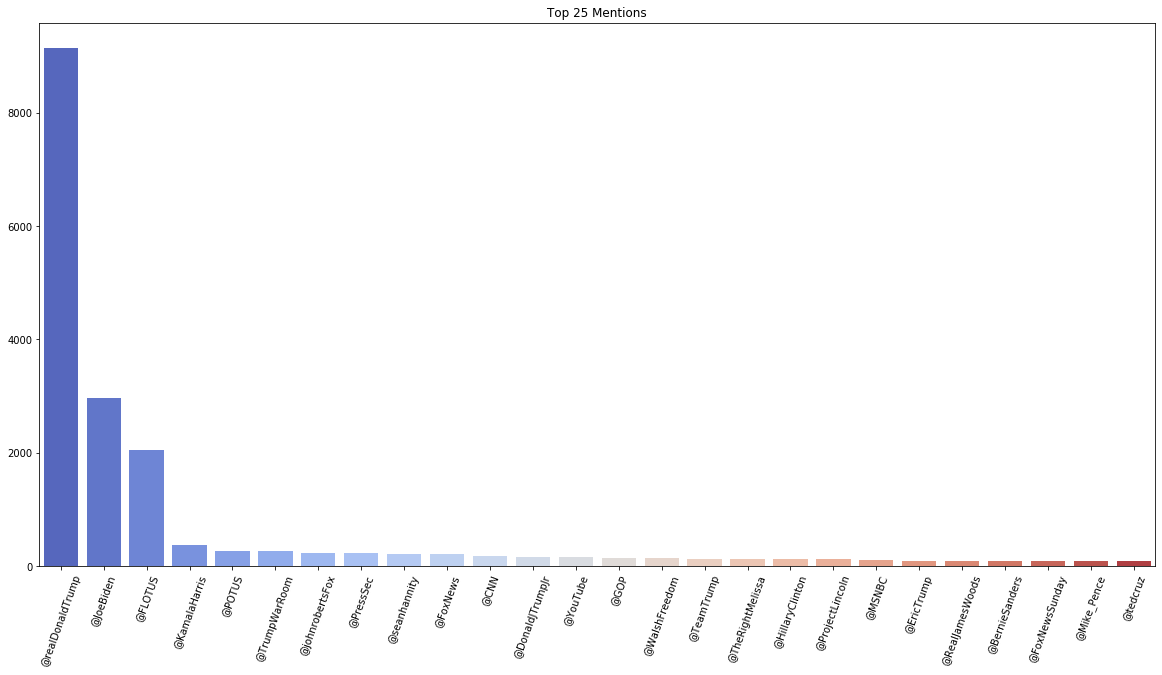

In [721]:
screen_names = {}
for text in df.tweet_text:
    if text[:3] == 'RT ':
        pass
    elif '@' in text:
        lst = text.split()
        ats = [at for at in lst if at[0] == '@']
        for names in ats:
            names = names.replace(':', '')
            if names not in screen_names:
                screen_names[names] = 1
            else:
                screen_names[names] += 1
    else:
        pass
    
names = np.array(list(screen_names.keys()))
count = np.array(list(screen_names.values()))
top_25_names = names[count.argsort()[::-1]][:26]
top_25_count = count[count.argsort()[::-1]][:26]
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(top_25_names, top_25_count, palette='coolwarm')
plt.xticks(rotation=70)
plt.title('Top 25 Mentions');

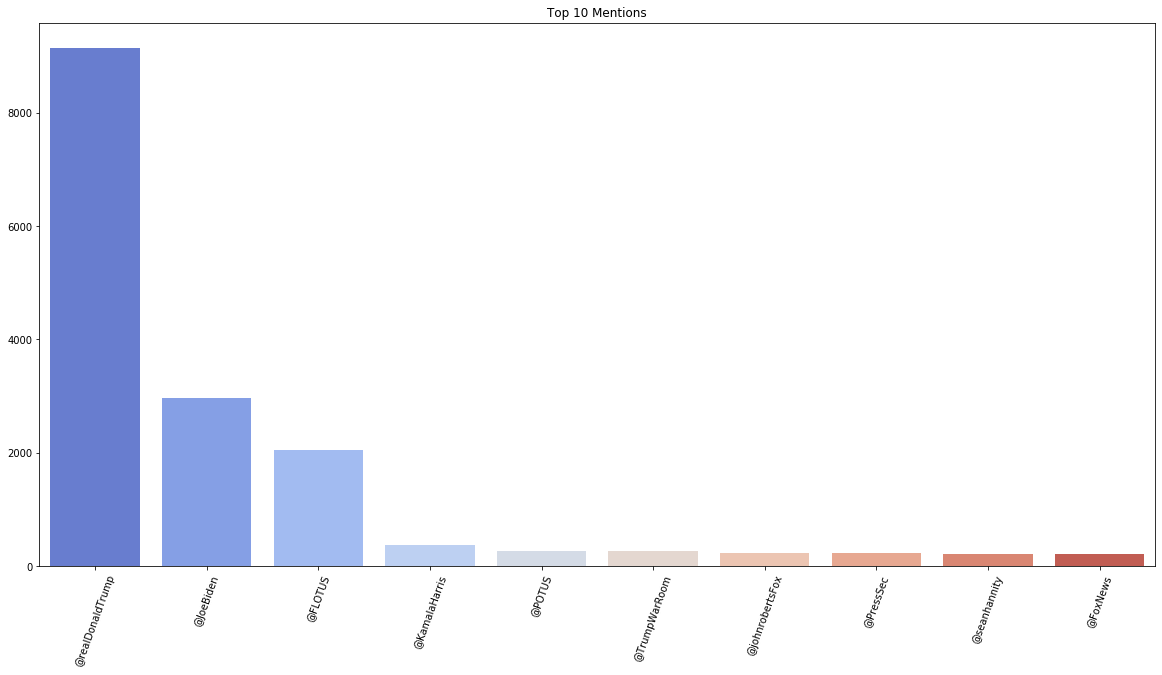

In [722]:
top_10_names = names[count.argsort()[::-1]][:10]
top_10_count = count[count.argsort()[::-1]][:10]
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(top_10_names, top_10_count, palette='coolwarm')
plt.xticks(rotation=70)
plt.title('Top 10 Mentions')
plt.savefig('../images/top_ten_mentions.png');

In [723]:
mentions = []
for i in top_10_names:
    for text in non_rt_df.tweet_text:
        mentions.append((i in text)*1)
        
slices = np.linspace(len(non_rt_df.tweet_text), len(mentions), 10)

for i in range(len(top_10_names)):
    if i == 0:
        non_rt_df[f'mentions_{top_10_names[i]}'] = mentions[:int(slices[i])]
    else:
        non_rt_df[f'mentions_{top_10_names[i]}'] = mentions[int(slices[i-1]):int(slices[i])]


/home/heather/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/heather/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [724]:
non_rt_df.columns

Index(['tweet_id', 'tweet_date', 'tweet_text', 'is_reply', 'is_quote',
       'is_retweet', 'sensitive', 'hashtags', 'mentions', 'u_verified',
       'u_egg', 'u_followers', 'u_created', 'retweets', 'favorites',
       'is_retweeted', 'is_favorited', 'tags_#Debates2020', 'tags_#Trump2020',
       'tags_#Trump', 'tags_#TrumpHasCovid', 'tags_#COVID19',
       'tags_#BidenHarris2020', 'tags_#MAGA', 'tags_#PresidentialDebate',
       'tags_#VoteHimOut', 'tags_#PresidentialDebate2020',
       'mentions_@realDonaldTrump', 'mentions_@JoeBiden', 'mentions_@FLOTUS',
       'mentions_@KamalaHarris', 'mentions_@POTUS', 'mentions_@TrumpWarRoom',
       'mentions_@johnrobertsFox', 'mentions_@PressSec',
       'mentions_@seanhannity', 'mentions_@FoxNews'],
      dtype='object')

## WORK WITH JUST THE FEATURES WE WANT TO PREDICT RETWEETS

In [726]:
encoded_df = non_rt_df[['tweet_text', 'retweets', 'is_retweeted', 'favorites', 'is_favorited', 'tags_#Debates2020', 'tags_#Trump2020', 'tags_#Trump',
       'tags_#TrumpHasCovid', 'tags_#COVID19', 'tags_#BidenHarris2020',
       'tags_#MAGA', 'tags_#PresidentialDebate', 'tags_#VoteHimOut',
       'tags_#PresidentialDebate2020', 'mentions_@realDonaldTrump',
       'mentions_@JoeBiden', 'mentions_@FLOTUS', 'mentions_@KamalaHarris',
       'mentions_@POTUS', 'mentions_@TrumpWarRoom', 'mentions_@johnrobertsFox',
       'mentions_@PressSec', 'mentions_@seanhannity', 'mentions_@FoxNews']]

In [727]:
def lemmatizer(string):
    # Lemmatize a string and return it in its original format
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(w)
                    for w in w_tokenizer.tokenize(string)
                    if "http" not in w])

encoded_df['tweet_text'] = encoded_df['tweet_text'].apply(lambda x: str(x).lower())
# encoded_df['tweet_text'] = encoded_df['tweet_text'].apply(lambda x: lemmatizer(x))

/home/heather/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


## Vectorize the bitch

In [728]:
stop_words = list(STOPWORDS)
stop_words.append('rt')

In [778]:
def orig_vect(X_train, custom_stopwords):
    '''
    pass in x training data to fit and transform to

    Returns:
     vectorizer, x_train vectorized
    '''
    vectorizer = TfidfVectorizer(stop_words=custom_stopwords, max_features = 1000,\
                                 analyzer='word', ngram_range=(1,2), )
    x_train_vect = vectorizer.fit_transform(X_train)
    return vectorizer, x_train_vect

In [779]:
vectorizer, x_train_vect = orig_vect(encoded_df.tweet_text, stop_words)

/home/heather/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [780]:
encoded_df.iloc[:, 5:-1]

,tags_#Debates2020,tags_#Trump2020,tags_#Trump,tags_#TrumpHasCovid,tags_#COVID19,tags_#BidenHarris2020,tags_#MAGA,tags_#PresidentialDebate,tags_#VoteHimOut,tags_#PresidentialDebate2020,mentions_@realDonaldTrump,mentions_@JoeBiden,mentions_@FLOTUS,mentions_@KamalaHarris,mentions_@POTUS,mentions_@TrumpWarRoom,mentions_@johnrobertsFox,mentions_@PressSec,mentions_@seanhannity
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
140324,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
140326,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
140333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [781]:
#combine vecotized tweets with other onehot encoded columns into one matrix
vect_tweets = x_train_vect.todense()
other_cols = np.array(encoded_df.iloc[:, 5:-1])
X = np.concatenate((vect_tweets, other_cols), axis = 1)

In [782]:
X.shape[1] == 519

False

## Classification

In [783]:
y = encoded_df['is_retweeted'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.25)


model = RandomForestClassifier(n_jobs=-1, max_depth=3, verbose = 1, class_weight = 'balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_train, y_train), model.score(X_test, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


(0.6092036527495315, 0.6005980861244019)

In [788]:
y = encoded_df['is_retweeted'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.25)


model = LogisticRegression(class_weight = 'balanced', verbose = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_train, y_train), model.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/heather/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s finished


(0.6391514136459704, 0.5985645933014354)

In [784]:
y = encoded_df['is_favorited'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.25)


model = RandomForestClassifier(n_jobs=-1, max_depth=3, verbose = 1, class_weight = 'balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_train, y_train), model.score(X_test, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


(0.5704829126291023, 0.5442583732057417)

<BarContainer object of 2 artists>

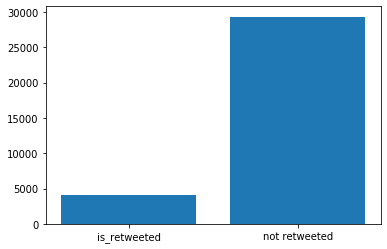

In [769]:
plt.bar(['is_retweeted', 'not retweeted'],[encoded_df['is_retweeted'].values.sum(), \
 len(encoded_df['is_retweeted'].values)-encoded_df['is_retweeted'].values.sum()])

In [736]:
total = len(encoded_df['is_retweeted'].values)
total_rt = encoded_df['is_retweeted'].values.sum()
total_not_rt = total-total_rt

In [737]:
total_rt/total, total_not_rt/total

(0.12282800490474624, 0.8771719950952538)

## Regression

In [785]:
y = encoded_df['favorites'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.25)


model = RandomForestRegressor(n_jobs=-1, max_depth=3, verbose = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_train, y_train), model.score(X_test, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   31.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


(0.7989037611042152, -0.7958555510773995)

In [786]:
y = encoded_df['retweets'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.25)


model = RandomForestRegressor(n_jobs=-1, max_depth=3, verbose = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_train, y_train), model.score(X_test, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


(0.8171194655860652, -0.6006779060457752)

In [790]:
y = encoded_df['retweets'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.25)


model = LogisticRegression(verbose = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_train, y_train), model.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/heather/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.1s finished


(0.877616939825338, 0.8763157894736842)